### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [4]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [94]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 312,1342,0,14.028000,10.240000,0.436200,-0.208650,0.012410,-0.000003

Rx: 4193,1342,0,13.965000,10.240000,0.319880,-0.180830,0.012410,0.000000

Rx: 8171,1342,0,13.986000,10.240000,0.334420,-0.208650,0.012410,0.000000

Rx: 12177,1342,0,13.986000,10.240000,0.276260,-0.139100,0.012410,0.021529

Rx: 16171,1342,0,13.944000,10.240000,0.348960,-0.208650,0.012410,-0.000003

Rx: 20174,1342,0,13.986000,10.240000,0.363500,-0.278200,0.012410,0.000000

Rx: 24171,1342,0,13

In [7]:
test_directory = Path("../test_data/fine_tip_clearance_revised/")

In [110]:
data_dict = {}
files = [
    # # 0.3
    # "test_0.3mm_pb_0.csv",
    # "test_0.3mm_pb_1.csv",
    # "test_0.3mm_pb_2.csv",

    # # # 0.4
    # "test_0.4mm_pb_0.csv",
    # "test_0.4mm_pb_1.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",

    # # # 0.5
    # "test_0.5mm_pb_0.csv",
    # "test_0.5mm_pb_1.csv",
    # "test_0.5mm_pb_2.csv",
    # "test_0.5mm_pb_3.csv",

    # # # 0.6
    # "test_0.6mm_pb_0.csv",
    # "test_0.6mm_pb_1.csv",
    # "test_0.6mm_pb_2.csv",
    # "test_0.6mm_pb_3.csv",

    # # # 0.7
    # "test_0.7mm_pb_0.csv",
    # "test_0.7mm_pb_1.csv",
    # "test_0.7mm_pb_2.csv",
    # "test_0.7mm_pb_3.csv",

    # # # 0.8
    # "test_0.8mm_pb_0.csv",
    # "test_0.8mm_pb_1.csv",
    # "test_0.8mm_pb_2.csv",
    # "test_0.8mm_pb_3.csv",

    # # # 0.9
    # "test_0.9mm_pb_0.csv",
    # "test_0.9mm_pb_2.csv",
    # "test_0.9mm_pb_3.csv",

    # # 1
    # "test_1mm_pb_0.csv",
    # "test_1mm_pb_1.csv",
    # "test_1mm_pb_2.csv",
    # "test_1mm_pb_3.csv",

    # # Open air
    "test_0mm_pb_0.csv",
    # "test_0mm_pb_1.csv",
    # "test_0mm_pb_2.csv",
    # "test_0mm_pb_3.csv",

    # Open air
    "test_single_top_pb_0.csv",
    "test_single_top_pb_1.csv",
    # "test_single_top_pb_4.csv",
    # "test_single_top_pb_5.csv",

    # "test_single_bottom_pb_0.csv",
    # "test_single_bottom_pb_1.csv",
    # "test_single_bottom_pb_3.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [106]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else 'N/A'
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name                tip_clearance_mm time_ms                     
test_0mm_pb_0.csv        0.0              0.340              1142.0   
                                          4.171                 0.0   
                                          8.174                 0.0   
                                          12.172                0.0   
                                          16.174                0.0   
...                                                             ...   
test_single_top_pb_5.csv N/A              101792.183            0.0   
                                          101796.168            0.0   
                                          101800.179            0.0   
                                          101804.168            0.0   
                                          101808.183            0.0   

                                                      bottom_motor_rpm  \
test_name                tip_clearance_mm time_ms                        
test_0mm_pb_0.csv        0.0              0.340                 1142.0   
                                          4.171                    0.0   
                                          8.174                    0.0   
                                          12.172                   0.0   
                                          16.174                   0.0   
...                                                                ...   
test_single_top_pb_5.csv N/A              101792.183            3685.0   
                                          101796.168            3657.0   
                                          101800.179            3657.0   
                                          101804.168            3642.0   
                                          101808.183            3714.0   

                                                      batt_voltage_V  \
test_name                tip_clearance_mm time_ms                      
test_0mm_pb_0.csv        0.0              0.340               13.965   
                                          4.171               13.986   
                                          8.174               13.986   
                                          12.172              13.986   
                                          16.174              13.923   
...                                                              ...   
test_single_top_pb_5.csv N/A              101792.183          13.650   
                                          101796.168          13.713   
                                          101800.179          13.734   
                                          101804.168          13.671   
                                          101808.183          13.671   

                                                      batt_current_A  \
test_name                tip_clearance_mm time_ms                      
test_0mm_pb_0.csv        0.0              0.340                10.24   
                                          4.171                10.24   
                                          8.174                10.24   
                                          12.172               10.24   
                                          16.174               10.24   
...                                                              ...   
test_single_top_pb_5.csv N/A              101792.183           10.24   
                                          101796.168           10.24   
                                          101800.179           10.24   
                                          101804.168           10.24   
                                          101808.183           10.24   

                                                      top_current_A  \
test_name                tip_clearance_mm time_ms                     
test_0mm_pb_0.csv        0.0              0.340             0.07270   
                                          4.171             0.14540   
         

In [107]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                            mean         std   
test_name                tip_clearance_mm throttle                             
test_0mm_pb_0.csv        0.0              30           6522.7685   41.600363   
                                          40           8158.2605  206.387622   
                                          50           9328.9840  115.088546   
                                          60          10642.7610  156.534911   
                                          70          11670.7155  274.314722   
                                          80          12688.7405  107.588944   
                                          90          13643.7080  111.434086   
                                          100         14531.2430  561.349024   
test_single_top_pb_0.csv N/A              30              0.0000    0.000000   
                                          40              0.0000    0.000000   
                                          50              0.0000    0.000000   
                                          60              0.0000    0.000000   
                                          70              0.0000    0.000000   
                                          80              0.0000    0.000000   
                                          90              0.0000    0.000000   
                                          100             0.0000    0.000000   
test_single_top_pb_1.csv N/A              30              0.0000    0.000000   
                                          40              0.0000    0.000000   
                                          50              0.0000    0.000000   
                                          60              0.0000    0.000000   
                                          70              0.0000    0.000000   
                                          80              0.0000    0.000000   
                                          90              0.0000    0.000000   
                                          100             0.0000    0.000000   
test_single_top_pb_2.csv N/A              30              0.0000    0.000000   
                                          40              0.0000    0.000000   
                                          50              0.0000    0.000000   
                                          60              0.0000    0.000000   
                                          70              0.0000    0.000000   
                                          80              0.0000    0.000000   
                                          90              0.0000    0.000000   
                                          100             0.0000    0.000000   
test_single_top_pb_3.csv N/A              30              0.0000    0.000000   
                                          40              0.0000    0.000000   
                                          50              0.0000    0.000000   
                                          60              0.0000    0.000000   
                                          70              0.0000    0.000000   
                                          80              0.0000    0.000000   
                                          90              0.0000    0.000000   
                                          100             0.0000    0.000000   
test_single_top_pb_4.csv N/A              30              0.0000    0.000000   
                                          40              0.0000    0.000000   
                                          50              0.0000    0.000000   
                                          60              0.0000    0.000000   
                                          70              0.0000    0.000000   
                                          80              0.0000    0.000000   
                                          90              0.0000    0.000000   
                                          100      

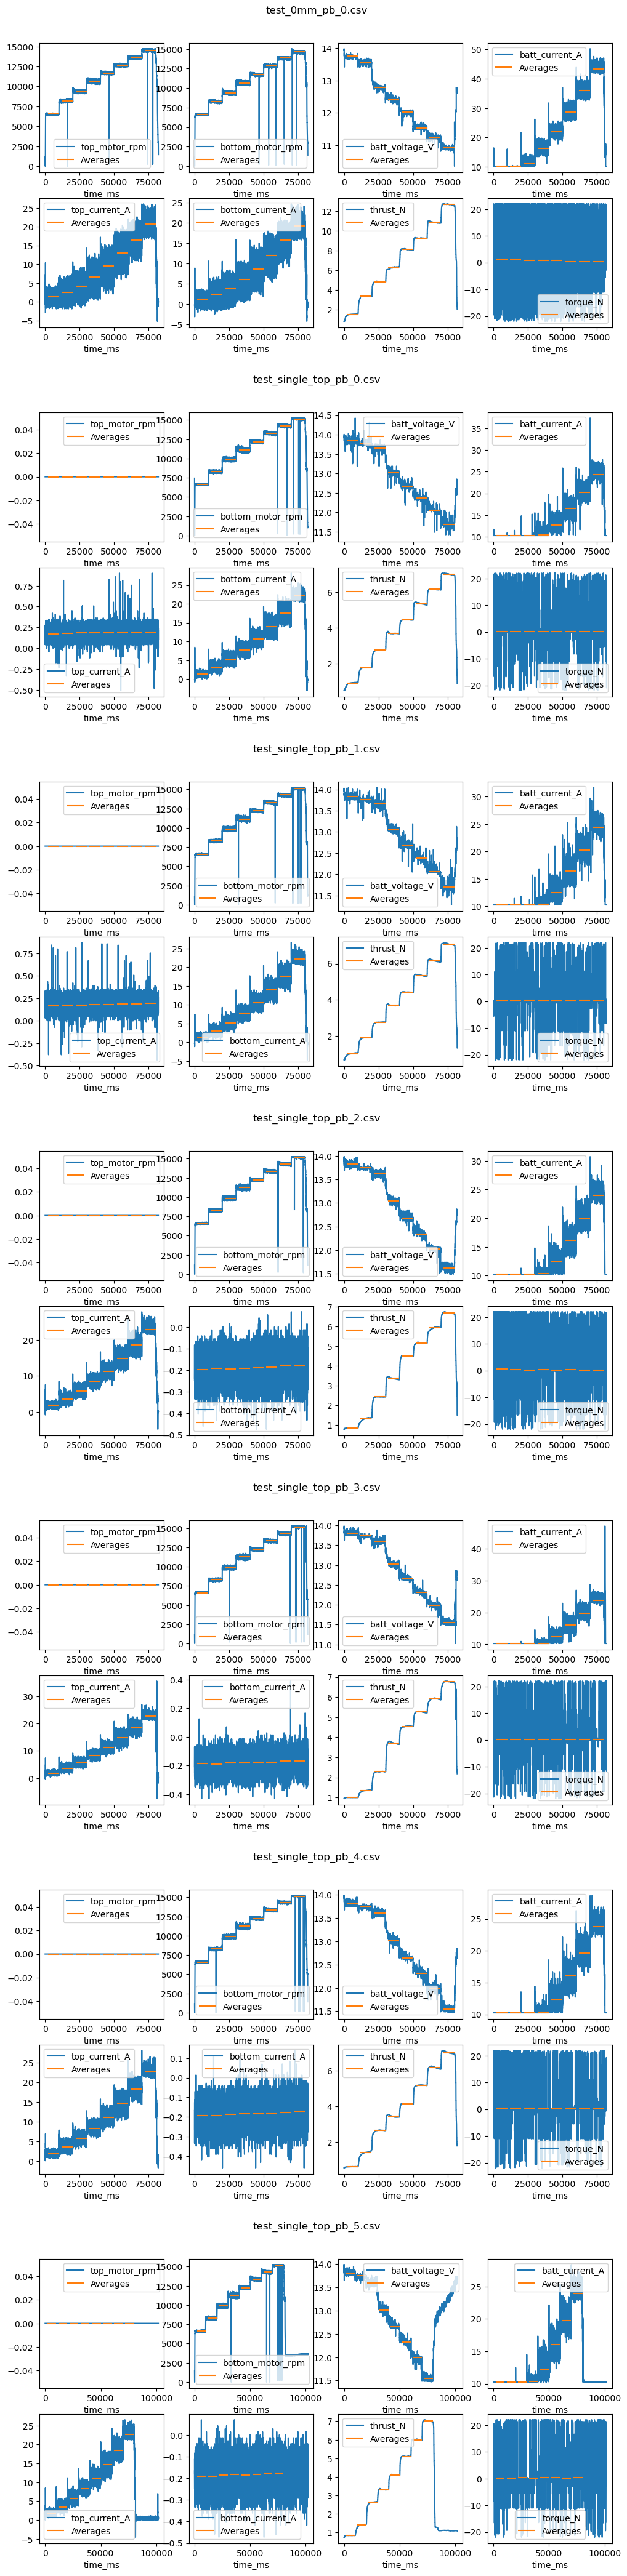

In [108]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [109]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [100]:
# df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 60) & (df_thrust_power.index.get_level_values('tip_clearance_mm') > 0)].groupby('tip_clearance_mm').agg('mean')
# df_thrust_power_agg

In [101]:
# plt.errorbar(x=df_thrust_power_agg.index.get_level_values('tip_clearance_mm'), y="", yerr="thrust_power_err", data=df_thrust_power_agg, fmt='o', capsize=3, markersize=3)

In [102]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

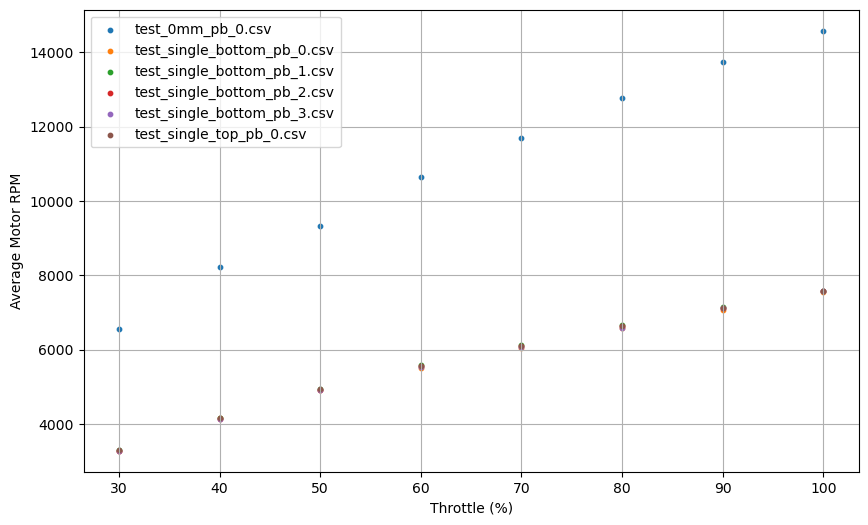

In [103]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

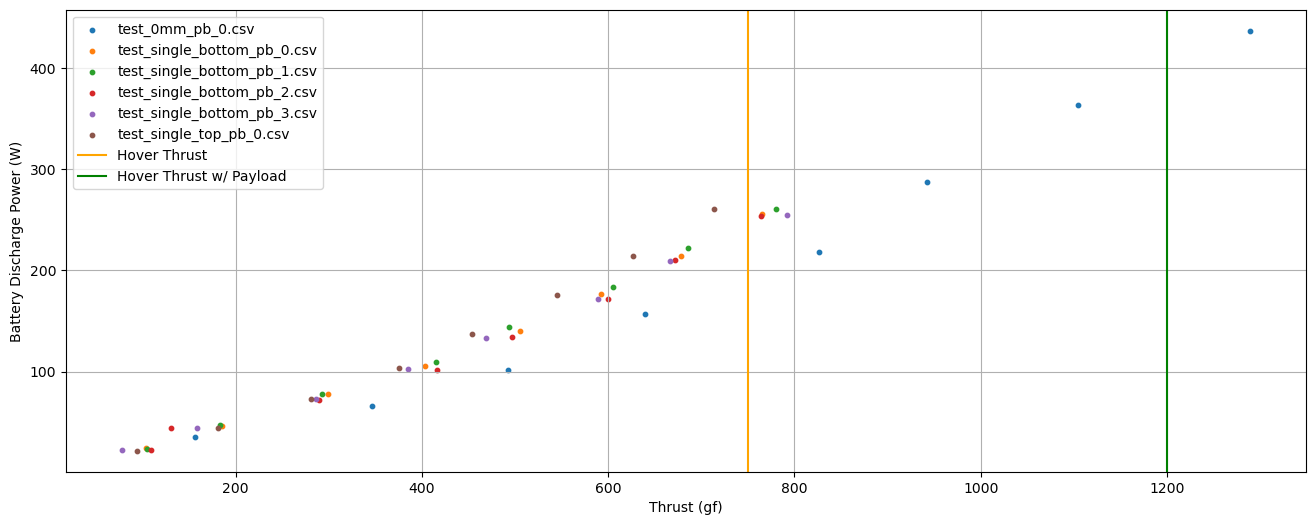

In [104]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=10)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

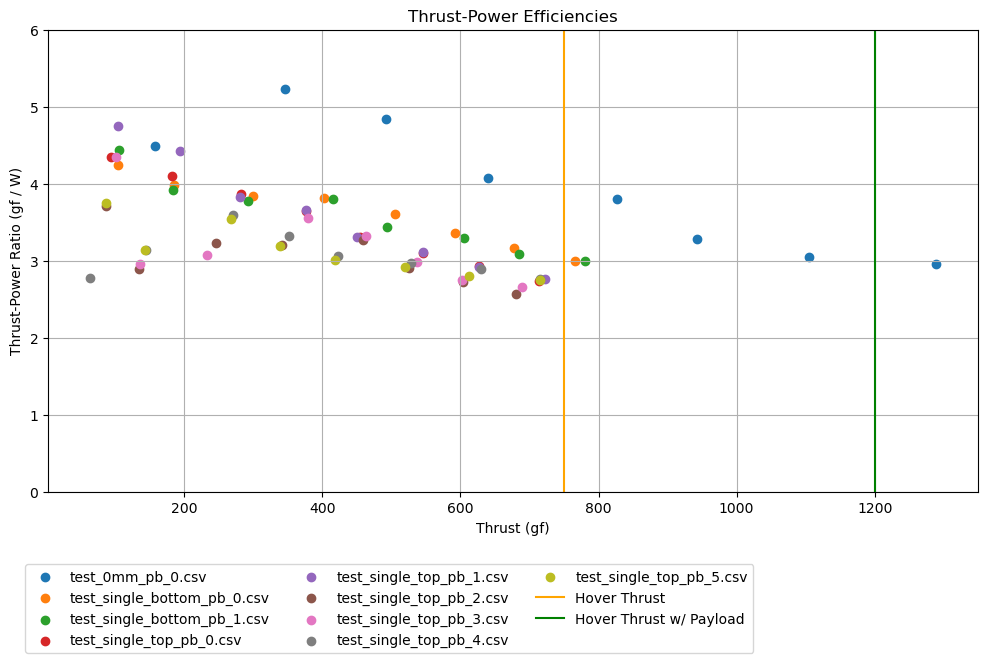

In [85]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

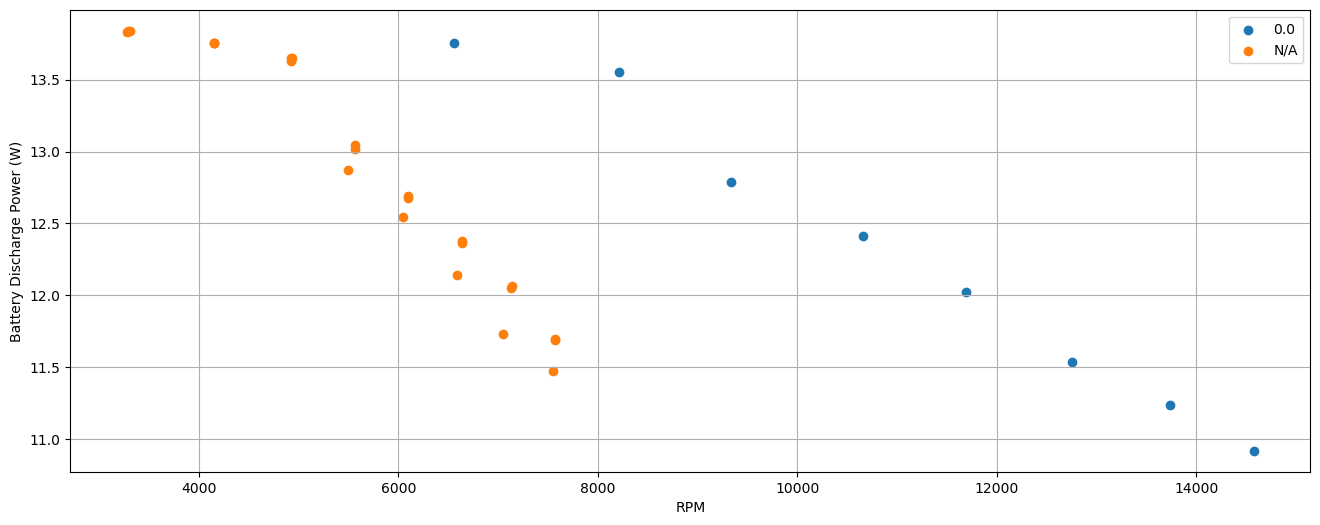

In [19]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    plt.scatter(x="rpm_avg", y="batt_voltage_mean", label=n, data=grp)
plt.xlabel("RPM")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.legend()
plt.show()

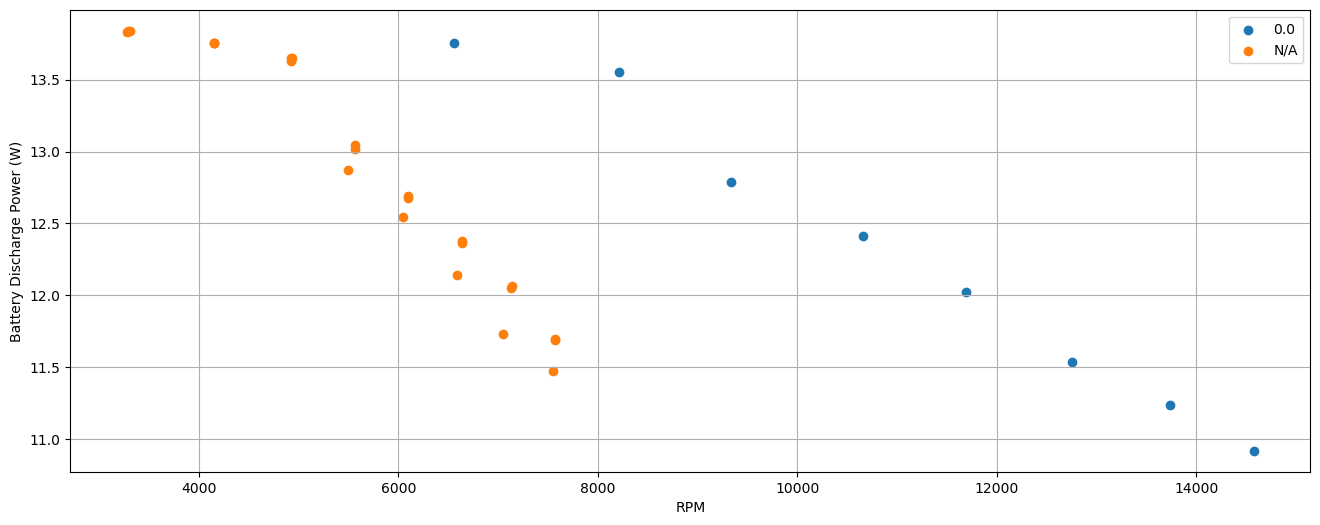

In [20]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    plt.scatter(x="rpm_avg", y="batt_voltage_mean", label=n, data=grp)
plt.xlabel("RPM")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.legend()
plt.show()

# My Stuff

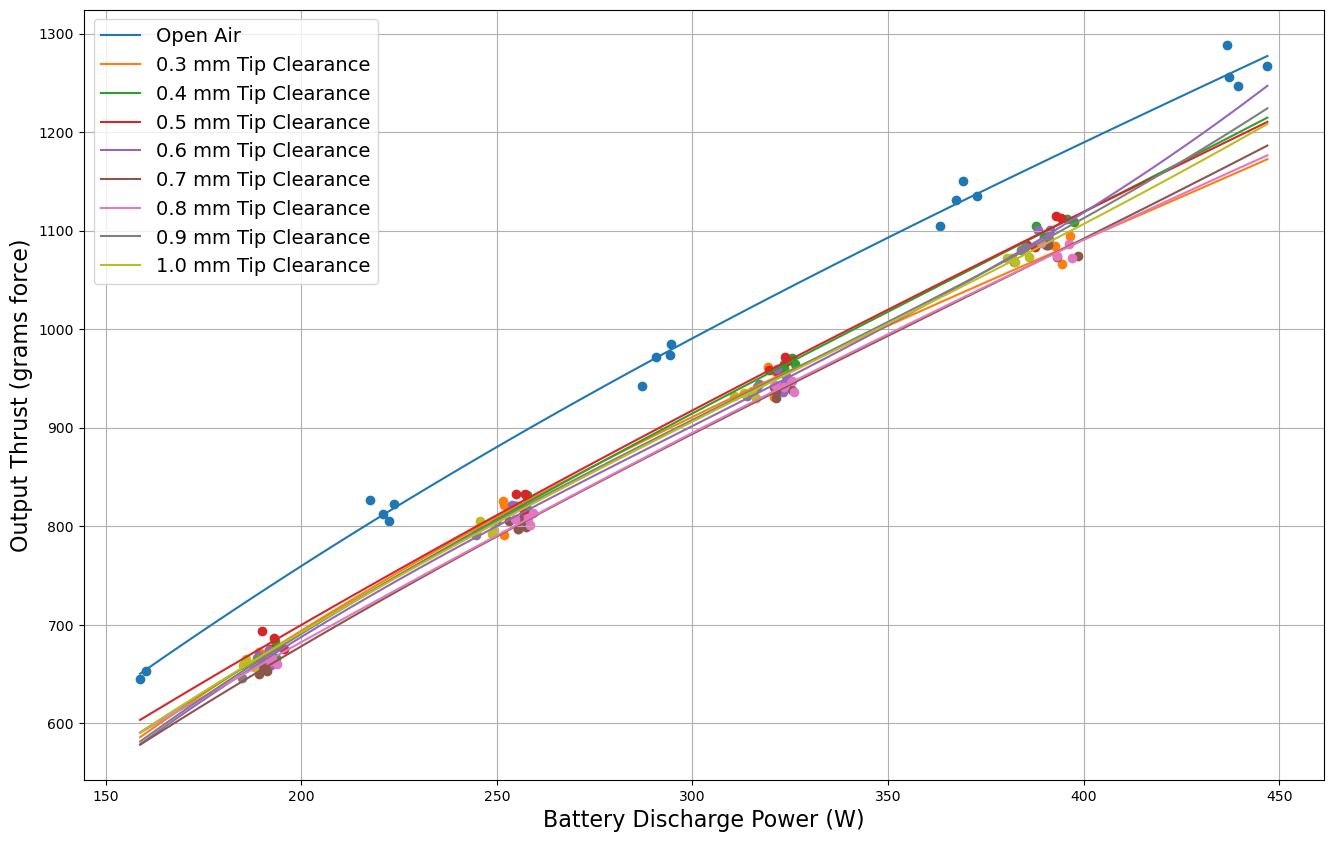

In [338]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = hover_thrust_g - 110
max_thrust = payload_thrust_g - 75

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9


def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err


plt.figure(figsize=(16, 10))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    if (n == 0.0): legend_label = "Open Air"

    plt.plot(x_dense, poly(x_dense), label=legend_label)
    plt.scatter(x, y)

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

In [340]:
760/690

1.1014492753623188